In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [ ]:
cim = pd.read_excel('Creative ID Mapping.xlsx')
cim.head()

,creative ID,Creative Type
0,47073,native
1,47947,native
2,52960,native
3,115773,native
4,127091,native


In [ ]:
cim.columns

Index(['creative ID', 'Creative Type'], dtype='object')

## Cleaning the data in the cim table

In [ ]:
cim['Creative Type'].value_counts()

native      21730
display      7859
video        1313
 display        1
 native         1
Name: Creative Type, dtype: int64

In [ ]:
# As we see in the Creative type column , there are spaces before the values so we can remove them
str(cim['Creative Type']).strip('')

'0         native\n1         native\n2         native\n3         native\n4         native\n          ...   \n30900     native\n30901     native\n30902     native\n30903     native\n30904    display\nName: Creative Type, Length: 30905, dtype: object'

In [ ]:
cim['Creative Type'] = cim['Creative Type'].replace(' native','native')
cim['Creative Type'] = cim['Creative Type'].replace(' display','display')

In [ ]:
cim['Creative Type'].value_counts()

native     21731
display     7860
video       1313
Name: Creative Type, dtype: int64

In [ ]:
cim.rename(columns={'creative ID':'Creative ID'},inplace=True)

## The Data table 

In [ ]:
data = pd.read_excel('Data - Jan 17.xlsx')
data.head()

,Advertiser ID,Campaign ID,Creative ID,Device Type,Spend,Impressions,Clicks,Video Started,Completed Video Views
0,1.0,29614.0,101140,tablet-app,0.333799,56.0,0,0,0
1,1.0,29614.0,101140,tablet-web,2.501653,381.0,1,0,0
2,1.0,29614.0,101140,mobile-app,4.255218,668.0,1,0,0
3,1.0,29614.0,101140,mobile-web,13.224842,2111.0,2,0,0
4,1.0,29614.0,101140,desktop,19.750004,3413.0,6,0,0


In [ ]:
data.columns

Index(['Advertiser ID', 'Campaign ID', 'Creative ID', 'Device Type', 'Spend',
       'Impressions', 'Clicks', 'Video Started', 'Completed Video Views'],
      dtype='object')

In [ ]:
data['Video Started'].value_counts()

0       129166
1          529
2          285
3          188
4          134
         ...  
590          1
4684         1
8778         1
462          1
2366         1
Name: Video Started, Length: 4589, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139696 entries, 0 to 139695
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Advertiser ID          139693 non-null  float64
 1   Campaign ID            139693 non-null  float64
 2   Creative ID            139696 non-null  int64  
 3   Device Type            139696 non-null  object 
 4   Spend                  139696 non-null  float64
 5   Impressions            139696 non-null  float64
 6   Clicks                 139696 non-null  int64  
 7   Video Started          139696 non-null  int64  
 8   Completed Video Views  139696 non-null  int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 9.6+ MB


## The Video Mapping Table

In [ ]:
vm = pd.read_excel('Video Mapping.xlsx')
vm.head()

,Creative ID,Video Type,Video Duration
0,16663,outstream,15
1,16667,outstream,30
2,60320,outstream,15
3,60322,outstream,15
4,60324,outstream,30


In [ ]:
vm.shape

(1313, 3)

In [ ]:
vm['Video Duration'].value_counts()

15      438
30      279
3       133
6        57
1        26
       ... 
6000      1
46        1
45        1
43        1
107       1
Name: Video Duration, Length: 85, dtype: int64

In [ ]:
vm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Creative ID     1313 non-null   int64 
 1   Video Type      1300 non-null   object
 2   Video Duration  1313 non-null   object
dtypes: int64(1), object(2)
memory usage: 30.9+ KB


So here the Video Type column has some null values , we need to impute them and check for any inconsistencies in data

In [ ]:
vm['Video Type'].value_counts()

instream         527
outstream        498
interstitial     270
 interstitial      2
instreatial        2
outstrea           1
Name: Video Type, dtype: int64

In [ ]:
vm['Video Type'] = vm['Video Type'].replace(' interstitial','interstitial')
vm['Video Type'] = vm['Video Type'].replace('instreatial','interstitial')
vm['Video Type'] = vm['Video Type'].replace('outstrea','outstream')


checking to confirm the changes...

In [ ]:
vm['Video Type'].value_counts()

instream        527
outstream       499
interstitial    274
Name: Video Type, dtype: int64

Now for the missing values , we will impute them with the most frequent values

In [ ]:
# for each column, get value counts in decreasing order and take the index (value) of most common class
vm = vm.apply(lambda x: x.fillna(x.value_counts().index[0]))
vm

,Creative ID,Video Type,Video Duration
0,16663,outstream,15
1,16667,outstream,30
2,60320,outstream,15
3,60322,outstream,15
4,60324,outstream,30
...,...,...,...
1308,144016,outstream,2
1309,144017,outstream,2
1310,144018,interstitial,14
1311,144019,interstitial,27


In [ ]:
vm['Creative ID'] = vm['Creative ID'].astype('int')

In [ ]:
vm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Creative ID     1313 non-null   int64 
 1   Video Type      1313 non-null   object
 2   Video Duration  1313 non-null   object
dtypes: int64(1), object(2)
memory usage: 30.9+ KB


## Merging the Tables 

In [ ]:
# merging the data for better understanding of data
# first merge "data" and "cim" dataframes

dm1 = data.merge(cim,how = 'left', left_on='Creative ID', right_on='Creative ID')
dm1.head()

,Advertiser ID,Campaign ID,Creative ID,Device Type,Spend,Impressions,Clicks,Video Started,Completed Video Views,Creative Type
0,1.0,29614.0,101140,tablet-app,0.333799,56.0,0,0,0,native
1,1.0,29614.0,101140,tablet-web,2.501653,381.0,1,0,0,native
2,1.0,29614.0,101140,mobile-app,4.255218,668.0,1,0,0,native
3,1.0,29614.0,101140,mobile-web,13.224842,2111.0,2,0,0,native
4,1.0,29614.0,101140,desktop,19.750004,3413.0,6,0,0,native


In [ ]:
dm1.shape

(139696, 10)

In [ ]:
dm1['Creative ID'].nunique(), vm['Creative ID'].nunique()

(30905, 1313)

In [ ]:
dm2 = dm1.merge(vm,how = 'left', left_on='Creative ID', right_on='Creative ID')
# dm2['Video Duration'] = dm2['Video Duration'].astype('int')

In [ ]:
dm2['Video Duration'].value_counts().sum()

10624

In [ ]:
dm2['Video Duration'].isnull().sum()

129072

In [ ]:
# Changing the nan values in Video Duration column to 0
dm2['Video Duration'].fillna(0,inplace=True)
dm2['Video Duration'].isnull().sum()

0

In [ ]:
dm2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139696 entries, 0 to 139695
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Advertiser ID          139693 non-null  float64
 1   Campaign ID            139693 non-null  float64
 2   Creative ID            139696 non-null  int64  
 3   Device Type            139696 non-null  object 
 4   Spend                  139696 non-null  float64
 5   Impressions            139696 non-null  float64
 6   Clicks                 139696 non-null  int64  
 7   Video Started          139696 non-null  int64  
 8   Completed Video Views  139696 non-null  int64  
 9   Creative Type          139691 non-null  object 
 10  Video Type             10624 non-null   object 
 11  Video Duration         139696 non-null  object 
dtypes: float64(4), int64(4), object(4)
memory usage: 13.9+ MB


In [ ]:
dm2['Video Duration'] = dm2['Video Duration'].astype('str')
dm2['Video Duration'].value_counts()

0      129072
15       3609
30       2029
3        1222
6         352
        ...  
57          6
45          6
107         3
126         3
202         3
Name: Video Duration, Length: 86, dtype: int64

In [ ]:
dm2.where(dm2 =='00:00:30')

dm2.loc[dm2['Video Duration'] == '00:00:30']
# Considering the Video Duration in Seconds we will convert this format to 30 and then change it to the integer format

dm2['Video Duration'] = dm2['Video Duration'].replace("00:00:30",30) 
dm2['Video Duration'] = dm2['Video Duration'].astype('int')

In [ ]:
dm2['Video Type'].isnull().sum()
# Changing the nan values in Video Duration column to 0
dm2['Video Duration'].fillna("NA",inplace=True)
dm2['Video Duration'].isnull().sum()

0

In [ ]:
dm2.head()

,Advertiser ID,Campaign ID,Creative ID,Device Type,Spend,Impressions,Clicks,Video Started,Completed Video Views,Creative Type,Video Type,Video Duration
0,1.0,29614.0,101140,tablet-app,0.333799,56.0,0,0,0,native,NaN,0
1,1.0,29614.0,101140,tablet-web,2.501653,381.0,1,0,0,native,NaN,0
2,1.0,29614.0,101140,mobile-app,4.255218,668.0,1,0,0,native,NaN,0
3,1.0,29614.0,101140,mobile-web,13.224842,2111.0,2,0,0,native,NaN,0
4,1.0,29614.0,101140,desktop,19.750004,3413.0,6,0,0,native,NaN,0


In [ ]:
dm2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139696 entries, 0 to 139695
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Advertiser ID          139693 non-null  float64
 1   Campaign ID            139693 non-null  float64
 2   Creative ID            139696 non-null  int64  
 3   Device Type            139696 non-null  object 
 4   Spend                  139696 non-null  float64
 5   Impressions            139696 non-null  float64
 6   Clicks                 139696 non-null  int64  
 7   Video Started          139696 non-null  int64  
 8   Completed Video Views  139696 non-null  int64  
 9   Creative Type          139691 non-null  object 
 10  Video Type             10624 non-null   object 
 11  Video Duration         139696 non-null  int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 13.9+ MB


In [ ]:
dm2['Video Started'].value_counts()

0       129166
1          529
2          285
3          188
4          134
         ...  
590          1
4684         1
8778         1
462          1
2366         1
Name: Video Started, Length: 4589, dtype: int64

In [ ]:
dm2['Completed Video Views'].value_counts()

0        129584
1           575
2           292
3           220
4           171
          ...  
25701         1
13423         1
26085         1
2236          1
1791          1
Name: Completed Video Views, Length: 3797, dtype: int64

In [ ]:
dm2.shape

(139696, 12)

In [ ]:
# Now we need to add two columns 1.CTR ,2.Video_metrics

dm2['CTR'] = np.round(dm2['Clicks']/dm2['Impressions'] , 4 )
dm2['Video_completion_rate'] = dm2['Completed Video Views']/dm2['Video Started']
dm2.head(3)

,Advertiser ID,Campaign ID,Creative ID,Device Type,Spend,Impressions,Clicks,Video Started,Completed Video Views,Creative Type,Video Type,Video Duration,CTR,Video_completion_rate
0,1.0,29614.0,101140,tablet-app,0.333799,56.0,0,0,0,native,NaN,0,0.0000,NaN
1,1.0,29614.0,101140,tablet-web,2.501653,381.0,1,0,0,native,NaN,0,0.0026,NaN
2,1.0,29614.0,101140,mobile-app,4.255218,668.0,1,0,0,native,NaN,0,0.0015,NaN


In [ ]:
#dm2.loc[dm2['CTR'] == inf]

dm2.CTR.value_counts()
dm2.CTR.fillna(0,inplace=True)
dm2.CTR.isnull().sum()

0

In [ ]:
dm2.Video_completion_rate.value_counts()

1.000000    631
0.000000    418
0.500000    180
0.666667    103
0.333333     87
           ... 
0.912874      1
0.738372      1
0.148148      1
0.460481      1
0.329167      1
Name: Video_completion_rate, Length: 7489, dtype: int64

In [ ]:
#(CPM) Cost Per Thousand = (Total Spend/ Total Measured Impressions) * 1000
dm2['CPM'] = (dm2['Spend'] / dm2['Impressions'])*1000
dm2.head(3)

,Advertiser ID,Campaign ID,Creative ID,Device Type,Spend,Impressions,Clicks,Video Started,Completed Video Views,Creative Type,Video Type,Video Duration,CTR,Video_completion_rate,CPM
0,1.0,29614.0,101140,tablet-app,0.333799,56.0,0,0,0,native,NaN,0,0.0000,NaN,5.960703
1,1.0,29614.0,101140,tablet-web,2.501653,381.0,1,0,0,native,NaN,0,0.0026,NaN,6.566018
2,1.0,29614.0,101140,mobile-app,4.255218,668.0,1,0,0,native,NaN,0,0.0015,NaN,6.370087


In [ ]:
# Now checking out CPC('Cost Per Click')
dm2['CPC'] = dm2['Spend']/dm2['Clicks']
dm2.head(3)

,Advertiser ID,Campaign ID,Creative ID,Device Type,Spend,Impressions,Clicks,Video Started,Completed Video Views,Creative Type,Video Type,Video Duration,CTR,Video_completion_rate,CPM,CPC
0,1.0,29614.0,101140,tablet-app,0.333799,56.0,0,0,0,native,NaN,0,0.0000,NaN,5.960703,inf
1,1.0,29614.0,101140,tablet-web,2.501653,381.0,1,0,0,native,NaN,0,0.0026,NaN,6.566018,2.501653
2,1.0,29614.0,101140,mobile-app,4.255218,668.0,1,0,0,native,NaN,0,0.0015,NaN,6.370087,4.255218


In [ ]:
dm2.CPC.value_counts()

inf         26957
0.000000     1257
0.001859        3
0.007006        2
0.005000        2
            ...  
0.750088        1
0.416991        1
0.370092        1
0.511260        1
3.647927        1
Name: CPC, Length: 102391, dtype: int64

In [ ]:
dm2.CTR.value_counts()

0.0000    36094
0.0006     2519
0.0007     2506
0.0008     2458
0.0009     2340
          ...  
0.0612        1
0.0521        1
0.0707        1
0.0538        1
0.0503        1
Name: CTR, Length: 675, dtype: int64

In [ ]:
dm2['CTR'].astype('float32')

0         0.0000
1         0.0026
2         0.0015
3         0.0009
4         0.0018
           ...  
139691    0.0026
139692    0.0031
139693    0.0000
139694    0.0000
139695    0.0011
Name: CTR, Length: 139696, dtype: float32

In [ ]:
# This is another way we can normalize Data, Normalizing Data in columns : device type,video type , creative type
#from sklearn.preprocessing import OneHotEncoder
#enc = OneHotEncoder()
#enc.fit_transform(x).toarray()


In [ ]:
cim.to_csv('cim.csv')
data.to_csv('data.csv')
vm.to_csv('vm.csv')

Now we have a final table on which we can do the analysis

In [ ]:
dm2 = dm2.replace([np.inf, -np.inf], np.nan)

In [ ]:
dm2.groupby(['Device Type'])['CTR'].mean()

Device Type
desktop       0.047528
mobile-app    0.015397
mobile-web    0.022755
tablet-app    0.015197
tablet-web    0.031190
unknown       0.004658
Name: CTR, dtype: float64

In [ ]:
dm2['CTR'].fillna(0,inplace=True)
dm2['CTR'].isnull().sum()

0

In [ ]:
dm2['CTR'] = dm2['CTR'].astype('int')

In [ ]:
dm2.CTR.value_counts()

0       139586
1          105
1269         1
740          1
468          1
204          1
141          1
Name: CTR, dtype: int64

In [ ]:
dm2.head()

,Advertiser ID,Campaign ID,Creative ID,Device Type,Spend,Impressions,Clicks,Video Started,Completed Video Views,Creative Type,Video Type,Video Duration,CTR,Video_completion_rate,CPM,CPC
0,1.0,29614.0,101140,tablet-app,0.333799,56.0,0,0,0,native,NaN,0,0,NaN,5.960703,NaN
1,1.0,29614.0,101140,tablet-web,2.501653,381.0,1,0,0,native,NaN,0,0,NaN,6.566018,2.501653
2,1.0,29614.0,101140,mobile-app,4.255218,668.0,1,0,0,native,NaN,0,0,NaN,6.370087,4.255218
3,1.0,29614.0,101140,mobile-web,13.224842,2111.0,2,0,0,native,NaN,0,0,NaN,6.264728,6.612421
4,1.0,29614.0,101140,desktop,19.750004,3413.0,6,0,0,native,NaN,0,0,NaN,5.786699,3.291667


In [ ]:
dm2.columns

Index(['Advertiser ID', 'Campaign ID', 'Creative ID', 'Device Type', 'Spend',
       'Impressions', 'Clicks', 'Video Started', 'Completed Video Views',
       'Creative Type', 'Video Type', 'Video Duration', 'CTR',
       'Video_completion_rate', 'CPM', 'CPC'],
      dtype='object')

In [ ]:
dm2['Creative Type'].value_counts()

native     99742
display    29325
video      10624
Name: Creative Type, dtype: int64

In [ ]:
dm2['Video Type'].value_counts()

instream        4207
outstream       4016
interstitial    2401
Name: Video Type, dtype: int64

In [ ]:
# Checking correlation

correlation = dm2['Spend'].corr(dm2['CTR'])
correlation

0.007203771462614071

Text(0, 0.5, 'CTR')

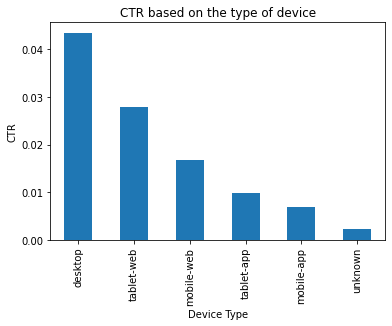

In [ ]:
# Checking which device generates more CTR

dm2.groupby(['Device Type'])['CTR'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title("CTR based on the type of device")
plt.ylabel("CTR")

## Thus from this we can say that Desktops had the most CTR

Text(0, 0.5, 'Video_Completion_rate')

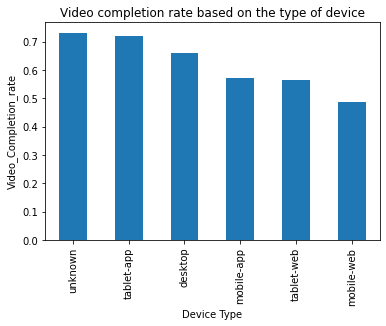

In [ ]:
# Checking which device generates more CTR

dm2.groupby(['Device Type'])['Video_completion_rate'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Video completion rate based on the type of device")
plt.ylabel("Video_Completion_rate")

Although the Desktops had more CTR , tablet-apps had more video completion rate , followed by Desktops , which says that bigger screen have more profound impact on the CTR.

In [ ]:
dm2['Video Started'].value_counts()

0       129166
1          529
2          285
3          188
4          134
         ...  
590          1
4684         1
8778         1
462          1
2366         1
Name: Video Started, Length: 4589, dtype: int64

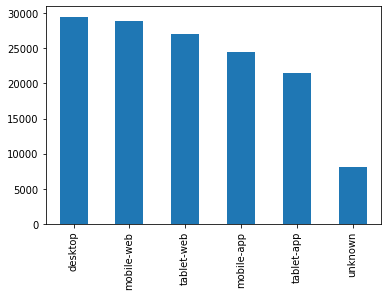

In [ ]:
dm2['Device Type'].value_counts().plot(kind='bar');

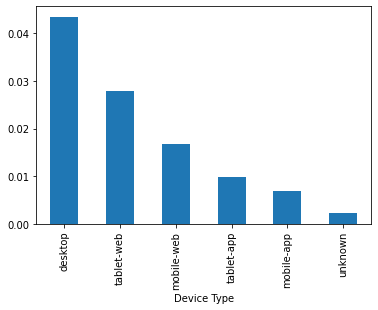

In [ ]:
# Which device has more influence in CTR
dm2.groupby(['Device Type'])['CTR'].mean().sort_values(ascending=False).plot(kind='bar');

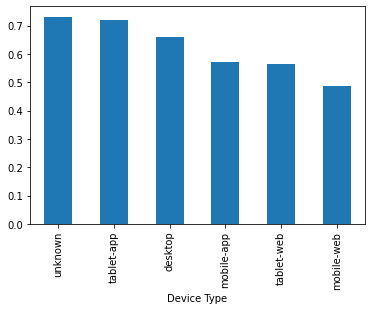

In [ ]:
# Which device has more influence on VCR
dm2.groupby(['Device Type'])['Video_completion_rate'].mean().sort_values(ascending=False).plot(kind='bar');

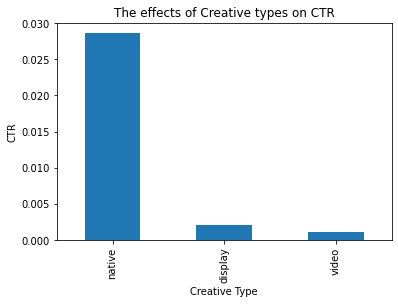

In [ ]:
# Which Creative Type has more CTR
dm2.groupby(['Creative Type'])['CTR'].mean().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('CTR')
plt.title("The effects of Creative types on CTR");

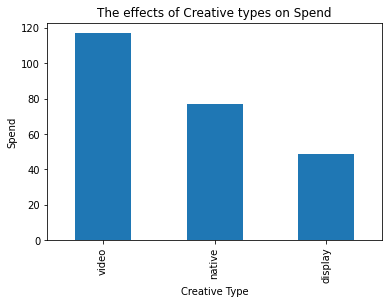

In [ ]:
# Which Creative Type has more CTR
dm2.groupby(['Creative Type'])['Spend'].mean().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Spend')
plt.title("The effects of Creative types on Spend");

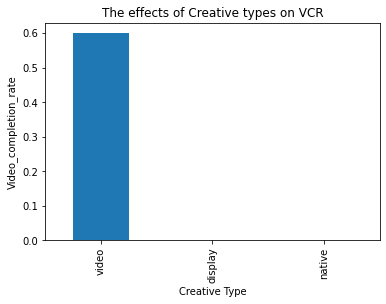

In [ ]:
# Which Creative Type has more VCR
dm2.groupby(['Creative Type'])['Video_completion_rate'].mean().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Video_completion_rate')
plt.title("The effects of Creative types on VCR");

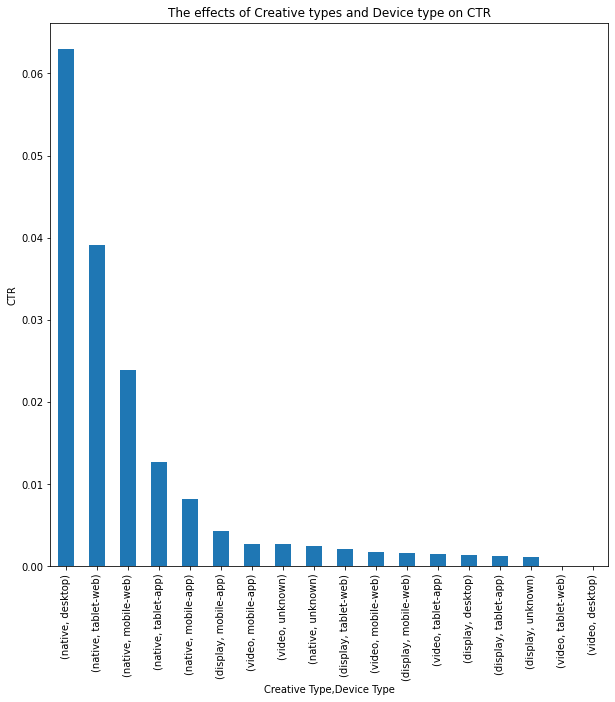

In [ ]:
plt.figure(figsize=(10,10))
dm2.groupby(['Creative Type','Device Type'])['CTR'].mean().sort_values(ascending=False).plot(kind='bar')
plt.ylabel("CTR")
plt.title("The effects of Creative types and Device type on CTR");

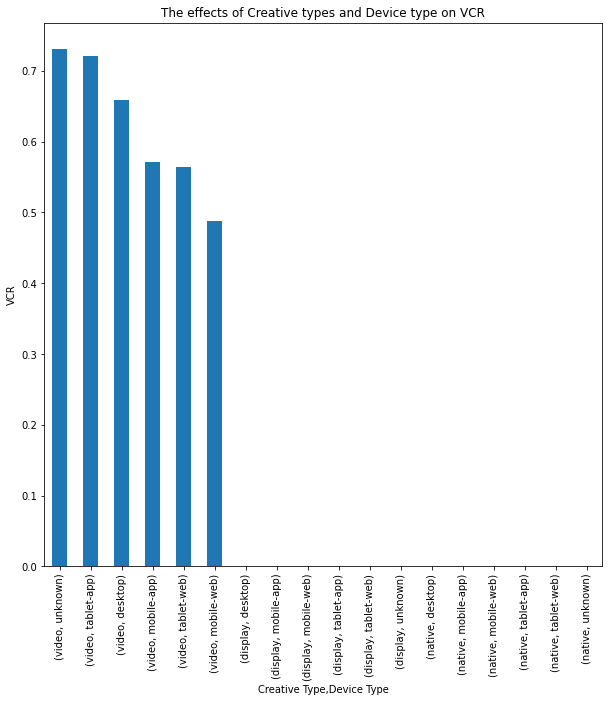

In [ ]:
plt.figure(figsize=(10,10))
dm2.groupby(['Creative Type','Device Type'])['Video_completion_rate'].mean().sort_values(ascending=False).plot(kind='bar')
plt.ylabel("VCR")
plt.title("The effects of Creative types and Device type on VCR");

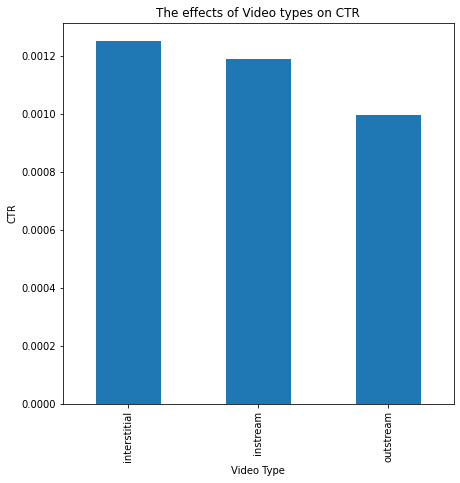

In [ ]:
plt.figure(figsize=(7,7))
dm2.groupby(['Video Type'])['CTR'].mean().sort_values(ascending=False).plot(kind='bar')
plt.ylabel("CTR")
plt.title("The effects of Video types on CTR");

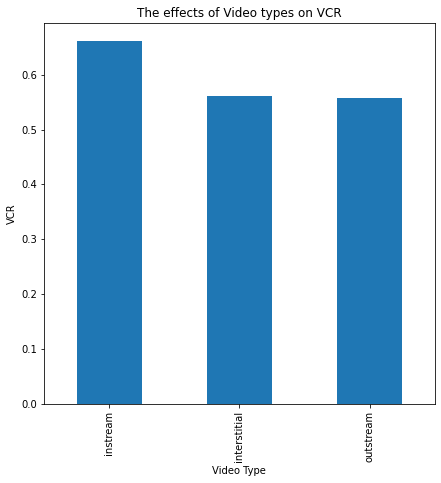

In [ ]:
plt.figure(figsize=(7,7))
dm2.groupby(['Video Type'])['Video_completion_rate'].mean().sort_values(ascending=False).plot(kind='bar')
plt.ylabel("VCR")
plt.title("The effects of Video types on VCR");

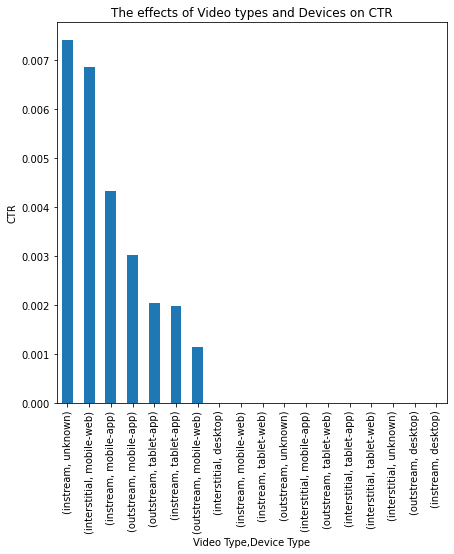

In [ ]:
plt.figure(figsize=(7,7))
dm2.groupby(['Video Type','Device Type'])['CTR'].mean().sort_values(ascending=False).plot(kind='bar')
plt.ylabel("CTR")
plt.title("The effects of Video types and Devices on CTR");

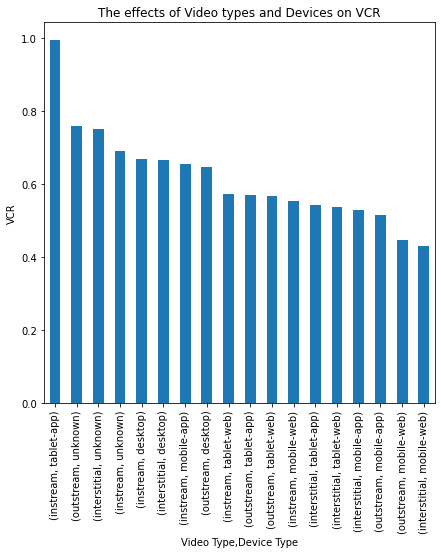

In [ ]:
plt.figure(figsize=(7,7))
dm2.groupby(['Video Type','Device Type'])['Video_completion_rate'].mean().sort_values(ascending=False).plot(kind='bar')
plt.ylabel("VCR")
plt.title("The effects of Video types and Devices on VCR");

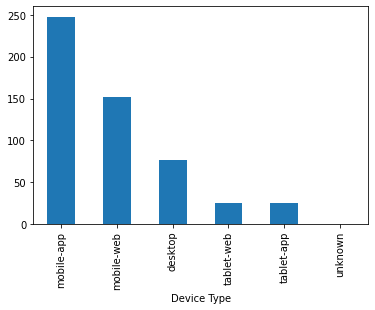

In [ ]:
dm2.groupby(['Device Type'])['Clicks'].mean().sort_values(ascending=False).plot(kind='bar');

In [ ]:
dm2['Video Duration'].value_counts()

0      129072
15       3609
30       2036
3        1222
6         352
        ...  
104         6
46          6
107         3
126         3
202         3
Name: Video Duration, Length: 85, dtype: int64

In [ ]:
dm2['Campaign ID'].value_counts()

32853.0    976
33055.0    479
29746.0    478
37564.0    473
36666.0    469
          ... 
31790.0      1
31789.0      1
27708.0      1
30490.0      1
31314.0      1
Name: Campaign ID, Length: 6376, dtype: int64

In [ ]:
dm2.describe()

,Advertiser ID,Campaign ID,Creative ID,Spend,Impressions,Clicks,Video Started,Completed Video Views,Video Duration,CTR,Video_completion_rate,CPM,CPC
count,139693.000000,139693.000000,139696.000000,139696.000000,1.396960e+05,139696.000000,139696.000000,139696.000000,139696.000000,139696.000000,10530.000000,139445.000000,103651.000000
mean,6953.500727,33510.157030,122726.016880,74.161697,3.404366e+04,99.857856,588.765799,375.638465,2.551140,0.020953,0.599710,4.648443,2.222244
std,3205.966398,3660.507701,14184.363687,407.297173,2.926281e+05,1389.337982,9482.712078,6324.132220,56.924161,4.178046,2.140551,26.801289,7.828220
min,1.000000,2178.000000,6696.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4809.000000,32068.000000,114430.000000,0.519274,1.730000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.355810,1.677149,0.538288
50%,7546.000000,34060.000000,123669.000000,6.040858,1.944000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.615385,3.411372,0.984699
75%,9813.000000,36071.000000,133517.000000,34.423786,1.145450e+04,24.000000,0.000000,0.000000,0.000000,0.000000,0.770367,5.482162,1.976945
max,11469.000000,38245.000000,144128.000000,37417.665293,2.747453e+07,277340.000000,974111.000000,637843.000000,6000.000000,1269.000000,196.871429,7002.895516,969.254189


## Encoding the Data

In [ ]:
# Using the getdummies to encoding data
# Here our target variable is the Spend column 
#Encoding Data in columns : device type,video type , creative type
dm3 = pd.get_dummies(dm2)
dm3.head()

,Advertiser ID,Campaign ID,Creative ID,Spend,Impressions,Clicks,Video Started,Completed Video Views,Video Duration,CTR,Video_completion_rate,CPM,CPC,Device Type_desktop,Device Type_mobile-app,Device Type_mobile-web,Device Type_tablet-app,Device Type_tablet-web,Device Type_unknown,Creative Type_display,Creative Type_native,Creative Type_video,Video Type_instream,Video Type_interstitial,Video Type_outstream
0,1.0,29614.0,101140,0.333799,56.0,0,0,0,0,0,NaN,5.960703,NaN,0,0,0,1,0,0,0,1,0,0,0,0
1,1.0,29614.0,101140,2.501653,381.0,1,0,0,0,0,NaN,6.566018,2.501653,0,0,0,0,1,0,0,1,0,0,0,0
2,1.0,29614.0,101140,4.255218,668.0,1,0,0,0,0,NaN,6.370087,4.255218,0,1,0,0,0,0,0,1,0,0,0,0
3,1.0,29614.0,101140,13.224842,2111.0,2,0,0,0,0,NaN,6.264728,6.612421,0,0,1,0,0,0,0,1,0,0,0,0
4,1.0,29614.0,101140,19.750004,3413.0,6,0,0,0,0,NaN,5.786699,3.291667,1,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
dm3.head()


,Advertiser ID,Campaign ID,Creative ID,Spend,Impressions,Clicks,Video Started,Completed Video Views,Video Duration,CTR,Video_completion_rate,CPM,CPC,Device Type_desktop,Device Type_mobile-app,Device Type_mobile-web,Device Type_tablet-app,Device Type_tablet-web,Device Type_unknown,Creative Type_display,Creative Type_native,Creative Type_video,Video Type_instream,Video Type_interstitial,Video Type_outstream
0,1.0,29614.0,101140,0.333799,56.0,0,0,0,0,0,NaN,5.960703,NaN,0,0,0,1,0,0,0,1,0,0,0,0
1,1.0,29614.0,101140,2.501653,381.0,1,0,0,0,0,NaN,6.566018,2.501653,0,0,0,0,1,0,0,1,0,0,0,0
2,1.0,29614.0,101140,4.255218,668.0,1,0,0,0,0,NaN,6.370087,4.255218,0,1,0,0,0,0,0,1,0,0,0,0
3,1.0,29614.0,101140,13.224842,2111.0,2,0,0,0,0,NaN,6.264728,6.612421,0,0,1,0,0,0,0,1,0,0,0,0
4,1.0,29614.0,101140,19.750004,3413.0,6,0,0,0,0,NaN,5.786699,3.291667,1,0,0,0,0,0,0,1,0,0,0,0


# Cleaning the null values in normalized dataset

In [ ]:
dm3.Video_completion_rate.isnull().sum()
# Changing the nan values in Video_Completion_rate column to 0
dm3['Video_completion_rate'].fillna(0,inplace=True)
dm3['Video_completion_rate'].isnull().sum()

0

In [ ]:
dm3.CPM.isnull().sum()
# Changing the nan values in Video_Completion_rate column to 0
dm3['CPM'].fillna(0,inplace=True)
dm3['CPM'].isnull().sum()

0

In [ ]:
dm3.CPC.isnull().sum()
# Changing the nan values in Video_Completion_rate column to 0
dm3['CPC'].fillna(0,inplace=True)
dm3['CPC'].isnull().sum()

0

In [ ]:
dm3.to_csv(r'C:\Users\ruchi\OneDrive\Desktop\final_table.csv')

In [ ]:
dm2.to_csv(r'C:\Users\ruchi\OneDrive\Desktop\final_table1.csv')

# Analyzing with Machine learning Models

In [ ]:
from sklearn.model_selection import train_test_split
df_x = dm3.drop(columns=['CTR','Advertiser ID','Campaign ID','Creative ID'])
df_y = dm3['CTR']
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

In [ ]:
y_train.dtypes

dtype('int64')

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = regressor.predict(x_test)
print(y_pred)

[ 0.06005392  0.29016118 -0.22662657 ... -0.08853398  0.04405478
 -0.32693253]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.3721877807964491
Mean Squared Error: 4.382286523602585
Root Mean Squared Error: 2.0933911539897614


In [ ]:
#decision tree
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
dt.score(x_test,y_test)

0.5118182797202034

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred  = pd.DataFrame(regressor.predict(x_test))
y_pred.index = y_test.index
# X_grid = np.arange(min(x_test), max(x_test), 0.01)
# X_grid = X_grid.reshape((len(x_grid), 1))
# plt.scatter(x_test, y_test, color = 'red')
# plt.plot(X_grid, y_pred, color = 'blue')

In [ ]:
y_preds = pd.DataFrame(y_test).merge(y_pred,left_index=True ,right_index = True)
y_preds.head()
y_preds.rename(columns={0:'prediction','CTR':'Target'},inplace=True)
y_preds['diff'] = np.square(y_preds['Target'] - y_preds['prediction'])
y_preds.head()

,Target,prediction,diff
80268,0,0.0,0.0
89917,0,0.0,0.0
103717,0,0.0,0.0
76628,0,0.0,0.0
50723,0,0.0,0.0


In [ ]:
# Average squared error
y_preds['diff'].sum()/y_preds['diff'].count()

0.8983489620615606

## **Descriptive Statistics for the parameters**

In [ ]:
d = np.round(dm2.describe(), 2)[['Spend','Impressions', 'Clicks', 'Video Started', 'Completed Video Views']]

In [ ]:
print(d)

           Spend  Impressions     Clicks  Video Started  Completed Video Views
count  139696.00    139696.00  139696.00      139696.00              139696.00
mean       74.16     34043.66      99.86         588.77                 375.64
std       407.30    292628.12    1389.34        9482.71                6324.13
min         0.00         0.00       0.00           0.00                   0.00
25%         0.52       173.00       0.00           0.00                   0.00
50%         6.04      1944.00       5.00           0.00                   0.00
75%        34.42     11454.50      24.00           0.00                   0.00
max     37417.67  27474526.00  277340.00      974111.00              637843.00


In [ ]:
d.to_csv('summary stats.csv', sep=',')